In [1]:
import numpy  as np
import pandas as pd
import gc
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

In [25]:
df = pd.read_csv('~/Documents/data/groceries-dataset/Groceries_dataset.csv')

display(df.sample(5))

,Member_number,Date,itemDescription
17420,1557,04-08-2015,hamburger meat
30515,4984,07-06-2014,domestic eggs
31053,2271,16-07-2014,coffee
29482,4216,17-11-2014,whole milk
35261,3081,18-07-2014,brown bread


In [26]:
from mlxtend.preprocessing     import TransactionEncoder

enc = TransactionEncoder()

transacoes    = [ t[1]['itemDescription'].tolist() for t in list(df.groupby(['Member_number', 'Date'])) ]
transcoes_mat = enc.fit(transacoes).transform(transacoes)
transcoes_mat = pd.DataFrame( transcoes_mat, columns=enc.columns_ )

display( transcoes_mat )

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# apriori

## teoria

![](../img/apriori.png)

## codigo

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649
2,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,0.000260,1.008012
111,(detergent),(rolls/buns),0.008621,0.110005,0.001002,0.116279,1.057037,0.000054,1.007100
224,"(whole milk, yogurt)",(rolls/buns),0.011161,0.110005,0.001337,0.119760,1.088685,0.000109,1.011083
133,(sausage),(frozen meals),0.060349,0.016775,0.001270,0.021041,1.254327,0.000257,1.004358


CPU times: user 866 ms, sys: 185 ms, total: 1.05 s
Wall time: 1.05 s


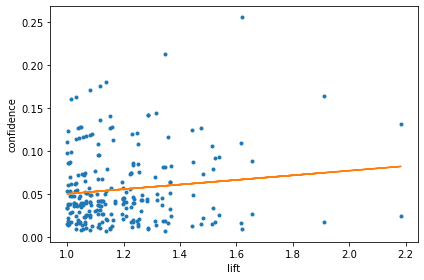

In [44]:
%%time
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

regras = apriori(transcoes_mat,
                 min_support  = 0.001,
                 use_colnames = True)
# regras['qtd'] = regras['itemsets'].apply(lambda x: len(x))
regras = association_rules(regras, 
                           metric        = 'lift', 
                           min_threshold = 1)

display( regras.sample(5) )

c1 = 'lift'
c2 = 'confidence'
_fit  = np.polyfit( regras[c1], regras[c2], 1)
_fitf = np.poly1d(_fit)

plt.plot(regras[c1], regras[c2], '.')
plt.plot(regras[c1], _fitf(regras[c1]))
plt.xlabel(c1)
plt.ylabel(c2)
plt.tight_layout();

detalhes das colunas em [how to read the above data?](https://www.kaggle.com/rockystats/apriori-algorithm-or-market-basket-analysis#How-to-read-the-above-data-?)

# fp-growth

## teoria

## codigo

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
198,(pip fruit),(hard cheese),0.049054,0.014703,0.001069,0.021798,1.482586,0.000348,1.007254
168,(soda),(grapes),0.097106,0.014436,0.001403,0.014453,1.001195,0.000002,1.000018
80,(beef),(frozen vegetables),0.033950,0.028002,0.001270,0.037402,1.335656,0.000319,1.009764
160,(root vegetables),(sliced cheese),0.069572,0.014035,0.001203,0.017291,1.232030,0.000227,1.003314
179,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191


CPU times: user 139 ms, sys: 425 µs, total: 139 ms
Wall time: 137 ms


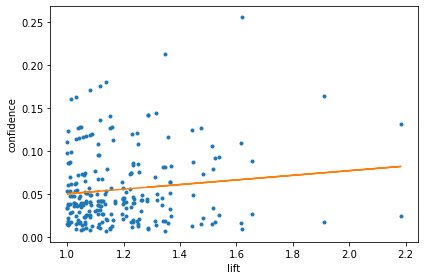

In [45]:
%%time
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

regras = fpgrowth(transcoes_mat,
                 min_support  = 0.001,
                 use_colnames = True)
# regras['qtd'] = regras['itemsets'].apply(lambda x: len(x))
regras = association_rules(regras, 
                           metric        = 'lift', 
                           min_threshold = 1)

display( regras.sample(5) )

c1 = 'lift'
c2 = 'confidence'
_fit  = np.polyfit( regras[c1], regras[c2], 1)
_fitf = np.poly1d(_fit)

plt.plot(regras[c1], regras[c2], '.')
plt.plot(regras[c1], _fitf(regras[c1]))
plt.xlabel(c1)
plt.ylabel(c2)
plt.tight_layout();

# eclat

## teoria

## codigo

- - -

# referencias

[a simple way to understand association rule](https://www.kaggle.com/keitazoumana/a-simple-way-to-understand-association-rule)<br/>
[comparative analysis between apriori and fp growth](https://www.kaggle.com/keitazoumana/comparative-analysis-between-apriori-and-fp-growth)

<br/>

**[minerações de dados frequentes com apriori e fp growth by abner suniga](https://medium.com/@abnersuniga7/encontre-padr%C3%B5es-nos-seus-dados-com-apriori-e-fp-growth-4a581ec1b22)**<br/>
[association rule mining using eclat algorithm by ana makharadze](https://medium.com/machine-learning-and-artificial-intelligence/3-4-association-rule-mining-using-eclat-algorithm-b6e50aab2147)

<br/>

[apriori algorithm](https://www.geeksforgeeks.org/apriori-algorithm/)<br/>
[frequent pattern growth algorithm](https://www.geeksforgeeks.org/ml-frequent-pattern-growth-algorithm/)<br/>
[eclat algorithm](https://www.geeksforgeeks.org/ml-eclat-algorithm/)

<br/><br/>

![](../img/apriori_1.png)